In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from models.fcnn import FCNNv1
from models.base import PytorchEstimator
from models.custom_pipeline import CustomPipeline
from models.utils import plot_train_validation_loss_per_epoch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [16]:
model_example = PytorchEstimator(model_class=FCNNv1,
                              model_arch={'HIDDEN_DIMS':[128, 64],
                                          "DROPOUT_PROB": 0.2},
                              task="classification",
                              epochs=200)

pipeline = CustomPipeline([
   #( "pca",PCA(15)),
   ("model", model_example)
])

pipeline.fit(X_train, y_train, validation_data=(X_val, y_val))


CustomPipeline(steps=[('model',
                       PytorchEstimator(epochs=200,
                                        model_arch={'DROPOUT_PROB': 0.2,
                                                    'HIDDEN_DIMS': [128, 64]},
                                        model_class=<class 'models.fcnn.FCNNv1'>))])

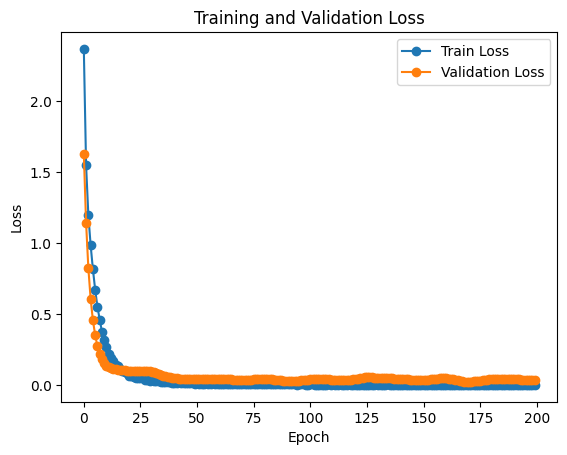

In [17]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()

In [18]:
from models.utils import Metrics

metrics_validation = Metrics("classification", y_val, pipeline.predict(X_val))
metrics_train = Metrics("classification", y_train, pipeline.predict(X_train))

metrics_validation.results, metrics_train.results


({'accuracy': 0.9888888888888889,
  'recall': 0.9888888888888889,
  'precision': 0.9901960784313726},
 {'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0})

## Just checking if CNN works as intended

In [19]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X.reshape(-1, 1, 8, 8), y, test_size=0.1)

In [20]:
from models.cnn import SimpleCNN
model_example = PytorchEstimator(model_class=SimpleCNN,
                              task="classification",
                              epochs=500)

model_example.fit(X_train, y_train, (X_val, y_val))

PytorchEstimator(epochs=500, model_arch={},
                 model_class=<class 'models.cnn.SimpleCNN'>)

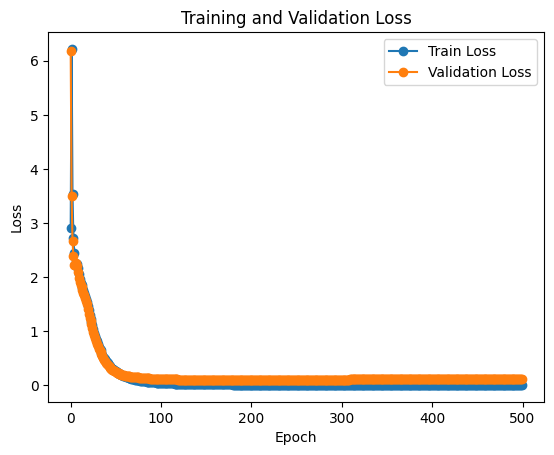

In [21]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()

In [22]:
print(f"Actual labels: {y_val[:10]} \nPredicted labels: {model_example.predict(X_val)[:10]}")


Actual labels: [9 4 2 1 7 0 9 2 0 4] 
Predicted labels: [9 4 2 1 7 0 9 2 0 4]


In [23]:
from models.utils import Metrics

metrics_validation = Metrics("classification", y_val, model_example.predict(X_val))
metrics_train = Metrics("classification", y_train, model_example.predict(X_train))

metrics_validation.results, metrics_train.results


({'accuracy': 0.9666666666666667,
  'recall': 0.9666666666666667,
  'precision': 0.967442156114925},
 {'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0})